## 🎲 Python Lab: Supervised Learning - Regression
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 5 - March 15, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week05/01_Supervised_Regression_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week05/01_Supervised_Regression_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

## 1️⃣ Data Generation and Preparation

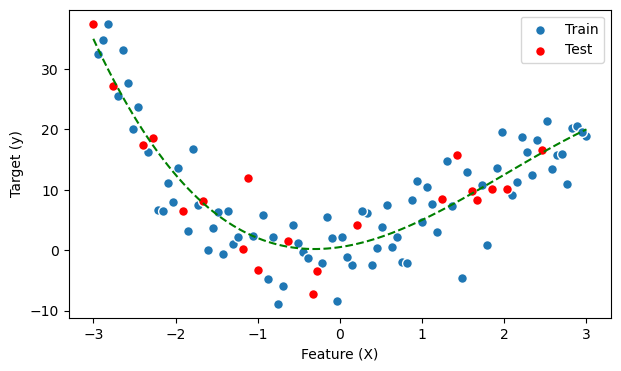

In [7]:
# Generate synthetic nonlinear data
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y_true = 0.5 + 2*X + 3*X**2 -0.5*X**3
y = y_true + np.random.normal(0, 5, X.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot setup
def plot_data(Test=False):
    plt.figure(figsize=(7, 4))
    if not Test:
        plt.scatter(X_train, y_train, s=50, edgecolor='white', label='Train')
    plt.scatter(X_test, y_test, s=50, edgecolor='white', facecolor='red', label='Test')
    plt.legend()
    plt.xlabel('Feature (X)')
    plt.ylabel('Target (y)')
    
plot_data()
plt.plot(X, y_true, color='green', linestyle='--', label='True relationship')
plt.show()

## 2️⃣ Linear Regression
#### 🧮 From Scratch
Implement linear regression using the normal equation:
$$\theta = (X^T X)^{-1} X^T y$$

> **TODO**: Implement the normal equation to find the optimal parameters

In [9]:
def linear_regression(X, y):
    # Add a column of ones for the intercept term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Calculate (X^T X)^(-1) X^T y
    # theta = ? #TODO
    
    return theta

In [10]:
# Fit linear regression model from scratch
theta = linear_regression(X_train, y_train)

# Make predictions
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_scratch = X_b_test @ theta

#### 📊 Using scikit-learn
> **TODO**: Implement linear regression using scikit-learn

In [12]:
# Create and fit the model
lin_reg = LinearRegression()
# lin_reg.fit(?, ?) # TODO

# Make predictions
y_pred_sklearn = lin_reg.predict(X_test)

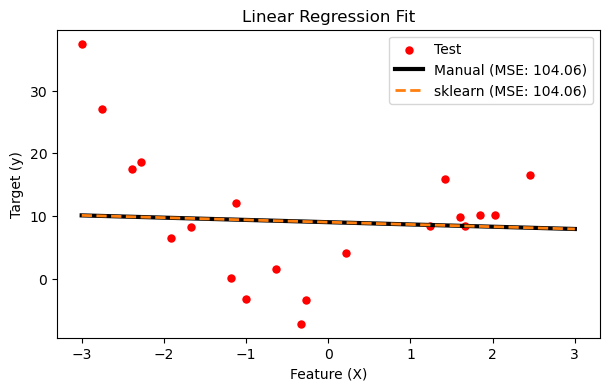

In [13]:
# Plot results
plot_data(Test=True)
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
x_b_plot = np.c_[np.ones((x_plot.shape[0], 1)), x_plot]

plt.plot(x_plot, x_b_plot @ theta, 'k', linewidth=3,
         label=f'Manual (MSE: {mean_squared_error(y_test, y_pred_scratch):.2f})')
plt.plot(x_plot, lin_reg.predict(x_plot), 'C1--', linewidth=2,
         label=f'sklearn (MSE: {mean_squared_error(y_test, y_pred_sklearn):.2f})')
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

In [14]:
print(f"Manual:  {theta[0]}, {theta[1]}")
print(f"sklearn: {lin_reg.intercept_}, {lin_reg.coef_[0]}")

Manual:  [8.99884102], [-0.3616482]
sklearn: [8.99884102], [-0.3616482]


## 3️⃣ Polynomial Regression
#### 🧮 From Scratch
> **TODO**: Implement polynomial feature generation

In [16]:
def polynomial_features(X, degree):
    n_samples, n_features = X.shape
    X_poly = np.ones((n_samples, 1))
    
    # for d in range(1, degree + 1):
        # X_poly = ??? # TODO
    
    return X_poly[:, 1:]  # Remove the ones column as we'll add it separately

In [17]:
def polynomial_regression(X, y, degree):
    # Generate polynomial features
    X_poly = polynomial_features(X, degree)
    
    # Add bias term
    X_poly_b = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]
    
    # Solve for parameters using normal equation
    theta = np.linalg.inv(X_poly_b.T @ X_poly_b) @ X_poly_b.T @ y
    
    return theta, X_poly

# Fit polynomial regression model (degree=2) from scratch
degree = 12
theta_poly, X_train_poly = polynomial_regression(X_train, y_train, degree)

# Make predictions
X_test_poly = polynomial_features(X_test, degree)
X_test_poly_b = np.c_[np.ones((X_test_poly.shape[0], 1)), X_test_poly]
y_pred_poly_scratch = X_test_poly_b @ theta_poly

#### 📊 Using scikit-learn
> **TODO**: Implement polynomial regression <br>
> 1. Define polynomial features of degree `n` <br>
> 2. Transform the nonlinear data <br>
> 3. Fit a linear regression model to the transformed data <br>
> 4. Make predictions and visualize results <br>

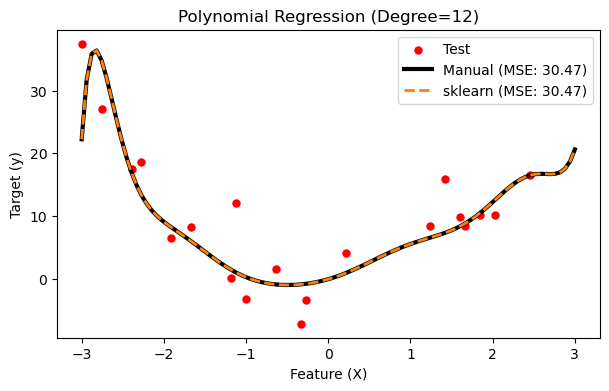

In [19]:
poly_features = PolynomialFeatures(degree=12, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

# Fit a linear model to polynomial features
poly_model = LinearRegression()
# poly_model.fit(?, ?) # TODO

X_test_poly = poly_features.transform(X_test)

# Plot results
X_plot_poly = poly_features.transform(x_plot)
y_plot_pred = poly_model.predict(X_plot_poly)

x_plot_poly = polynomial_features(x_plot, degree)
X_plot_poly_b = np.c_[np.ones((x_plot_poly.shape[0], 1)), x_plot_poly]

plot_data(Test=True)
plt.plot(x_plot, X_plot_poly_b @ theta_poly, 'k', linewidth=3,
         label=f'Manual (MSE: {mean_squared_error(y_test, y_pred_poly_scratch):.2f})')
plt.plot(x_plot, y_plot_pred, 'C1--', linewidth=2,
         label=f'sklearn (MSE: {mean_squared_error(y_test, poly_model.predict(X_test_poly)):.2f})')
plt.legend()
plt.title(f'Polynomial Regression (Degree={degree})')
plt.show()

> **TODO**: Compare the coefficients

In [20]:
# TODO

Manual:
[-0.0967, 3.7889, 3.8717, -0.3472, -1.5235, -1.3204, 0.8004, 0.6213,
 -0.2110, -0.1001, 0.0271, 0.0052, -0.0013]
sklearn:
[-0.0967, 3.7889, 3.8717, -0.3472, -1.5235, -1.3204, 0.8004, 0.6213, -0.2110,
 -0.1001, 0.0271, 0.0052, -0.0013]


> **TODO**: Create polynomial regression pipeline

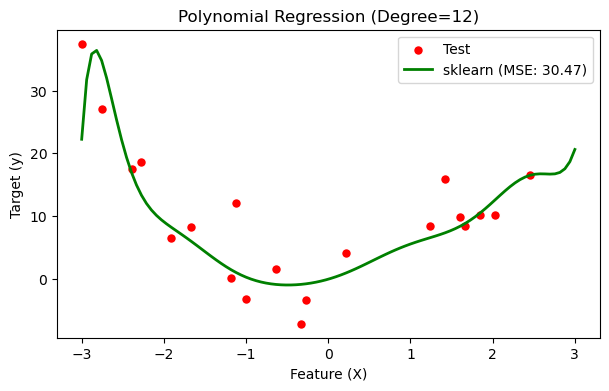

In [22]:
from sklearn.pipeline import make_pipeline

poly_reg = make_pipeline(
    PolynomialFeatures(degree=12, include_bias=False),
    LinearRegression()
)
# poly_reg.fit(?, ?) # TODO

# Plot results
plot_data(Test=True)
plt.plot(x_plot, poly_reg.predict(x_plot), color='green', linewidth=2,
         label=f'sklearn (MSE: {mean_squared_error(y_test, poly_reg.predict(X_test)):.2f})')
plt.legend()
plt.title("Polynomial Regression (Degree=12)")
plt.show()

## 4️⃣ Overfitting and Underfitting
> **TODO**: Compare training/test MSE across polynomial degrees

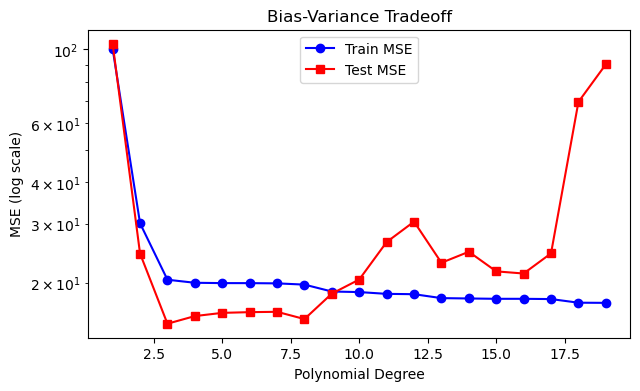

In [54]:
degrees = np.arange(1, 20)
train_mse = []
test_mse = []

for degree in degrees:
    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        LinearRegression()
    )
    # model.fit(?, ?) # TODO
    # train_mse.append(mean_squared_error(?, ?))
    # test_mse.append(mean_squared_error(?, ?))

plt.figure(figsize=(7, 4))
plt.plot(degrees, train_mse, 'bo-', label='Train MSE')
plt.plot(degrees, test_mse, 'rs-', label='Test MSE')
plt.yscale('log')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE (log scale)')
plt.legend()
plt.title("Bias-Variance Tradeoff")
plt.show()

## 5️⃣ Regularization Techniques
Regularization prevents overfitting by penalizing large coefficients. We'll explore:
- **Ridge**: L2 penalty (shrinks coefficients).
- **Lasso**: L1 penalty (sparsifies coefficients).
- **Elastic Net**: Combines L1 and L2.

## 🛡️ Ridge Regression
#### 🧮 From Scratch
Implement ridge regression using the normal equation:
$$\theta = (X^T X + \alpha I)^{-1} X^T y$$

> **TODO**: Implement ridge regression with regularization parameter alpha

In [25]:
def ridge_regression_scratch(X, y, alpha=1.0):
    # Add bias term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    
    # Get feature dimension (including bias)
    n_features = X_b.shape[1]
    
    # Create identity matrix of appropriate size
    identity = np.eye(n_features)
    identity[0, 0] = 0  # Don't regularize bias term
    
    # Apply ridge regression formula: θ = (X^T X + αI)^(-1) X^T y
    # theta_ridge = ? # TODO
    
    return theta_ridge

In [26]:
from sklearn.preprocessing import StandardScaler

# Scale features for regularization (important!)
scaler = StandardScaler()

# Generate polynomial features from scratch
X_train_poly_scratch = polynomial_features(X_train, degree)
X_test_poly_scratch = polynomial_features(X_test, degree)

# Scale features
X_train_poly_scratch_scaled = scaler.fit_transform(X_train_poly_scratch)
X_test_poly_scratch_scaled = scaler.transform(X_test_poly_scratch)

theta_ridge = ridge_regression_scratch(X_train_poly_scratch_scaled, y_train, 10)

# Make predictions
X_test_b = np.c_[np.ones((X_test_poly_scratch_scaled.shape[0], 1)), X_test_poly_scratch_scaled]
y_pred_ridge_scratch = X_test_b @ theta_ridge

#### 📊 Using scikit-learn

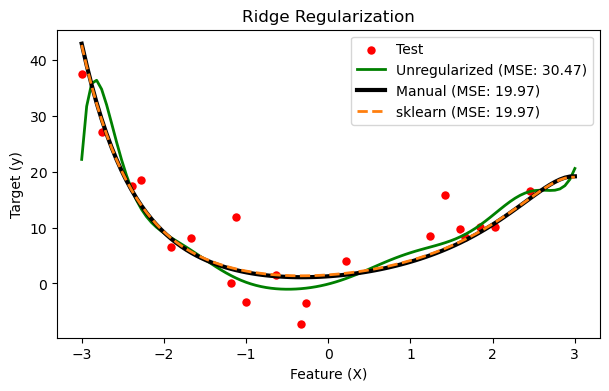

In [28]:
ridge_reg = make_pipeline(
    PolynomialFeatures(degree=12),
    StandardScaler(),
    Ridge(alpha=10, random_state=42)
)

x_plot_poly_scratch = polynomial_features(x_plot, degree)
x_plot_poly_scratch_scaled = scaler.fit_transform(x_plot_poly_scratch)
X_full_poly_b = np.c_[np.ones((x_plot_poly_scratch_scaled.shape[0], 1)), x_plot_poly_scratch_scaled]

plot_data(Test=True)
plt.plot(x_plot, poly_reg.predict(x_plot), color='green', linewidth=2,
         label=f'Unregularized (MSE: {mean_squared_error(y_test, poly_reg.predict(X_test)):.2f})')
plt.plot(x_plot, X_full_poly_b @ theta_ridge, 'k', linewidth=3,
         label=f'Manual (MSE: {mean_squared_error(y_test, y_pred_ridge_scratch):.2f})')
ridge_reg.fit(X_train, y_train)
plt.plot(x_plot, ridge_reg.predict(x_plot), 'C1--', linewidth=2,
         label=f'sklearn (MSE: {mean_squared_error(y_test, ridge_reg.predict(X_test)):.2f})')
plt.legend()
plt.title('Ridge Regularization', fontsize=12)
plt.show()

#### 🔧 Regularization (contd.)

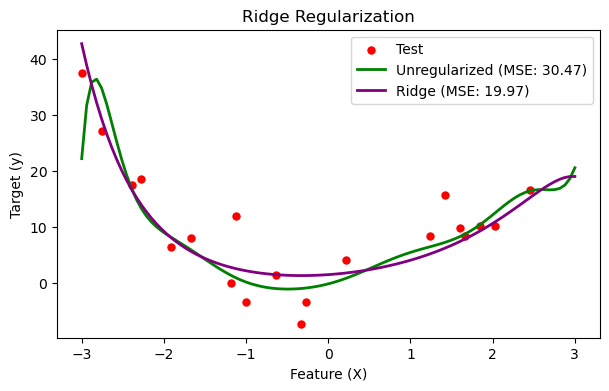

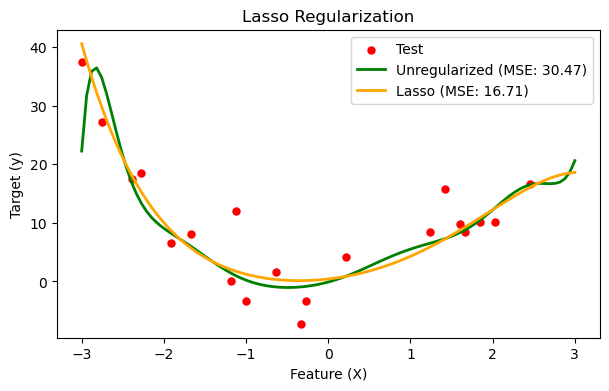

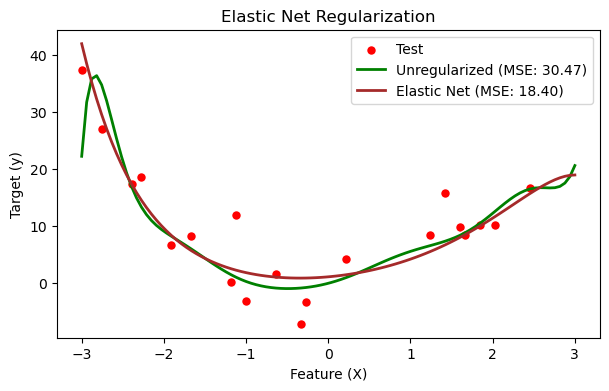

In [29]:
ridge_reg = make_pipeline(
    PolynomialFeatures(degree=12),
    StandardScaler(),
    Ridge(alpha=10, random_state=42)
)

lasso_reg = make_pipeline(
    PolynomialFeatures(degree=12),
    StandardScaler(),
    Lasso(alpha=0.1, random_state=42)
)

elastic_reg = make_pipeline(
    PolynomialFeatures(degree=12),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
)

models = [ridge_reg, lasso_reg, elastic_reg]
model_names = ['Ridge', 'Lasso', 'Elastic Net']
colors = ['purple', 'orange', 'brown']

for model, name, color in zip(models, model_names, colors):
    plot_data(Test=True)
    plt.plot(x_plot, poly_reg.predict(x_plot), color='green', linewidth=2,
             label=f'Unregularized (MSE: {mean_squared_error(y_test, poly_reg.predict(X_test)):.2f})')
    model.fit(X_train, y_train)
    plt.plot(x_plot, model.predict(x_plot), linewidth=2, label=f'{name} (MSE: {mean_squared_error(y_test, model.predict(X_test)):.2f})', color=color)
    plt.legend()
    plt.title(f'{name} Regularization', fontsize=12)
    plt.show()

## 6️⃣ Regularization Strength Analysis

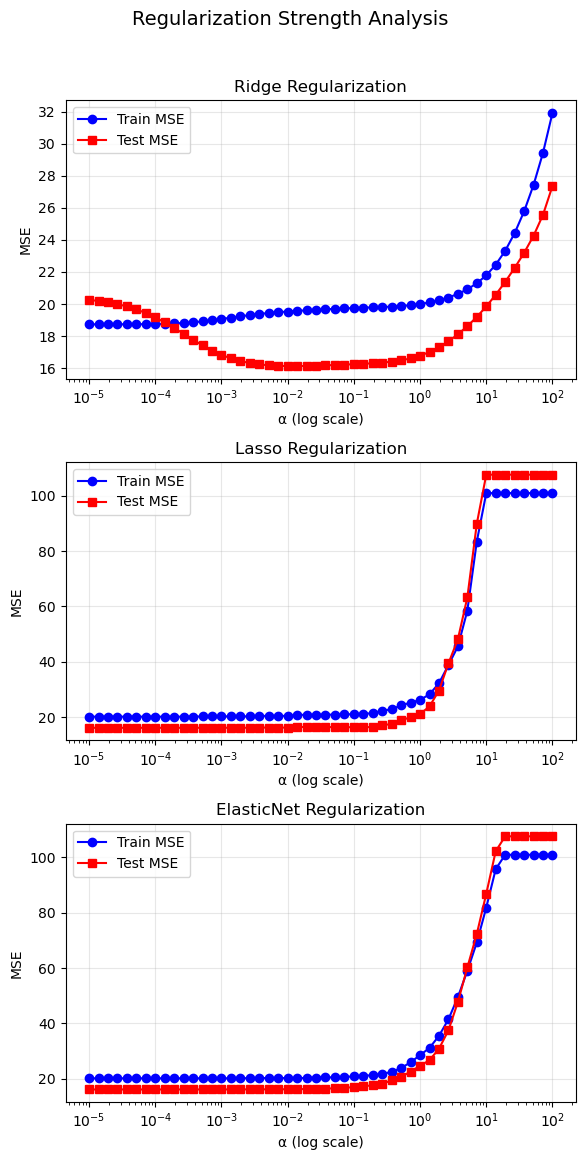

In [58]:
alphas = np.logspace(-5, 2, 50)
models = {
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42, max_iter=100, tol=0.1),
    'ElasticNet': ElasticNet(l1_ratio=0.5, random_state=42, max_iter=100, tol=0.1)
}

results = {name: {'train': [], 'test': []} for name in models}

for name, model in models.items():
    for alpha in alphas:
        current_model = make_pipeline(
            PolynomialFeatures(10),
            StandardScaler(),
            model.set_params(alpha=alpha)
        )
        current_model.fit(X_train, y_train)
        results[name]['train'].append(mean_squared_error(y_train, current_model.predict(X_train)))
        results[name]['test'].append(mean_squared_error(y_test, current_model.predict(X_test)))


# Plot results
fig, axes = plt.subplots(3, 1, figsize=(6, 11))
colors = ['purple', 'orange', 'green']

for ax, (name, color) in zip(axes, zip(models.keys(), colors)):
    ax.semilogx(alphas, results[name]['train'], 'bo-', label='Train MSE')
    ax.semilogx(alphas, results[name]['test'], 'rs-', label='Test MSE')
    ax.set_title(f'{name} Regularization', fontsize=12)
    ax.set_xlabel('α (log scale)', fontsize=10)
    ax.set_ylabel('MSE', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.suptitle("Regularization Strength Analysis", y=1.05, fontsize=14)
plt.show()

> **Exercises**
> 1. Experiment with different polynomial degrees (5, 15, 25) - observe bias-variance tradeoff
> 2. Implement Elastic Net regression from scratch using both L1 and L2 penalties
> 3. Apply to sklearn's diabetes dataset (sklearn.datasets.load_diabetes)
> 4. Compare coefficient magnitudes before/after regularization
> 5. Research and implement Bayesian Linear Regression